## Overfitting & Underfitting

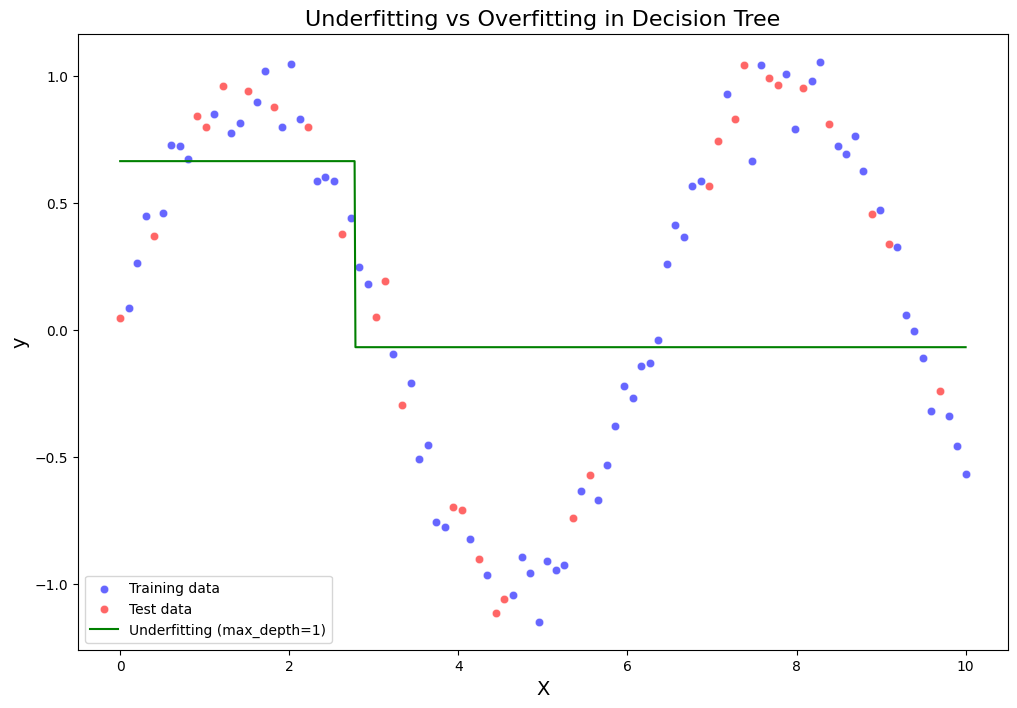

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Tạo dữ liệu minh họa
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Tạo các mô hình Decision Tree với độ phức tạp khác nhau
# Underfitting: max_depth quá nhỏ
tree_underfit = DecisionTreeRegressor(max_depth=1, random_state=42)
tree_underfit.fit(X_train, y_train)

# Overfitting: max_depth quá lớn
tree_overfit = DecisionTreeRegressor(max_depth=20, random_state=42)
tree_overfit.fit(X_train, y_train)

# Good fit: max_depth vừa phải
tree_goodfit = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_goodfit.fit(X_train, y_train)

# Dự đoán trên tập dữ liệu
X_plot = np.linspace(0, 10, 1000).reshape(-1, 1)
y_underfit = tree_underfit.predict(X_plot)
y_overfit = tree_overfit.predict(X_plot)
y_goodfit = tree_goodfit.predict(X_plot)

# Vẽ biểu đồ
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_train.ravel(), y=y_train, color='blue', label='Training data', alpha=0.6)
sns.scatterplot(x=X_test.ravel(), y=y_test, color='red', label='Test data', alpha=0.6)
sns.lineplot(x=X_plot.ravel(), y=y_underfit, color='green', label='Underfitting (max_depth=1)')
# sns.lineplot(x=X_plot.ravel(), y=y_overfit, color='purple', label='Overfitting (max_depth=20)')
# sns.lineplot(x=X_plot.ravel(), y=y_goodfit, color='orange', label='Good fit (max_depth=3)')
plt.title('Underfitting vs Overfitting in Decision Tree', fontsize=16)
plt.xlabel('X', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.legend()
plt.show()

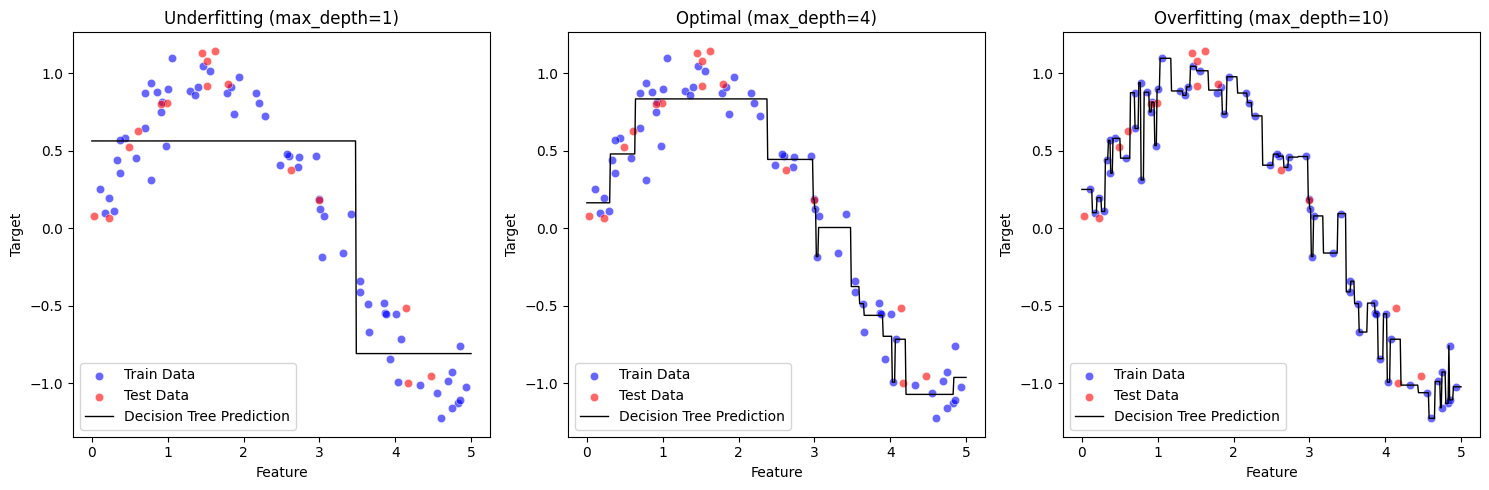

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Tạo dữ liệu giả lập
np.random.seed(42)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.15, X.shape[0])

# Tạo tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện các mô hình Decision Tree với độ sâu khác nhau
tree_underfit = DecisionTreeRegressor(max_depth=1)  # Underfitting
tree_optimal = DecisionTreeRegressor(max_depth=4)   # Optimal
tree_overfit = DecisionTreeRegressor(max_depth=10)  # Overfitting

tree_underfit.fit(X_train, y_train)
tree_optimal.fit(X_train, y_train)
tree_overfit.fit(X_train, y_train)

# Dự đoán
X_plot = np.linspace(0, 5, 500).reshape(-1, 1)
y_pred_underfit = tree_underfit.predict(X_plot)
y_pred_optimal = tree_optimal.predict(X_plot)
y_pred_overfit = tree_overfit.predict(X_plot)

# Vẽ biểu đồ
plt.figure(figsize=(15, 5))

models = [("Underfitting (max_depth=1)", y_pred_underfit),
          ("Optimal (max_depth=4)", y_pred_optimal),
          ("Overfitting (max_depth=10)", y_pred_overfit)]

for i, (title, y_pred) in enumerate(models, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x=X_train.ravel(), y=y_train, color='blue', label="Train Data", alpha=0.6)
    sns.scatterplot(x=X_test.ravel(), y=y_test, color='red', label="Test Data", alpha=0.6)
    plt.plot(X_plot, y_pred, color='black', linewidth=1, label="Decision Tree Prediction")
    plt.title(title)
    plt.xlabel("Feature")
    plt.ylabel("Target")
    plt.legend(loc='lower left')

plt.tight_layout()
plt.show()


## Tối ưu hóa thời gian và tài nguyên

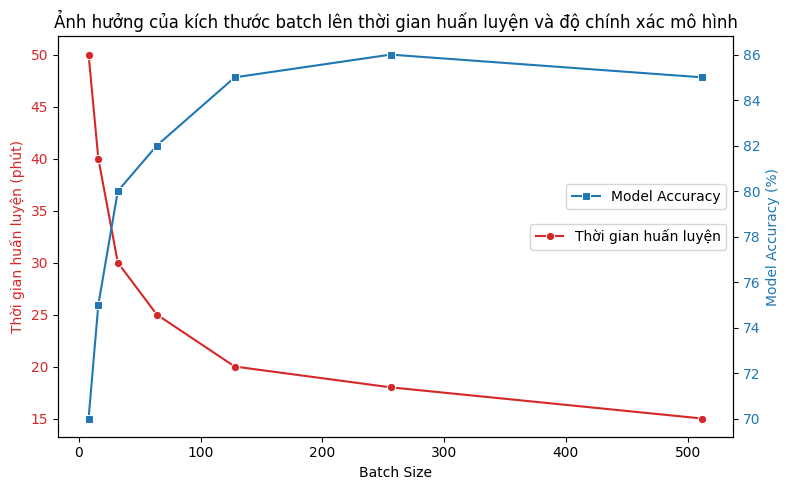

In [66]:
# Re-import libraries since execution state was reset
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dữ liệu minh họa về thời gian huấn luyện và hiệu suất mô hình
batch_sizes = np.array([8, 16, 32, 64, 128, 256, 512])
training_time = np.array([50, 40, 30, 25, 20, 18, 15])  # Giả lập thời gian huấn luyện (phút)
model_accuracy = np.array([70, 75, 80, 82, 85, 86, 85])  # Giả lập độ chính xác (%)

# Vẽ biểu đồ
fig, ax1 = plt.subplots(figsize=(8, 5))

# Vẽ thời gian huấn luyện
color = 'tab:red'
ax1.set_xlabel('Batch Size')
ax1.set_ylabel('Thời gian huấn luyện (phút)', color=color)
sns.lineplot(x=batch_sizes, y=training_time, marker='o', color=color, label="Thời gian huấn luyện", ax=ax1)
ax1.tick_params(axis='y', labelcolor=color)
plt.legend(loc='center right', bbox_to_anchor=(1.0, 0.5))

# Vẽ hiệu suất mô hình trên cùng một biểu đồ
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Model Accuracy (%)', color=color)  
sns.lineplot(x=batch_sizes, y=model_accuracy, marker='s', color=color, label="Model Accuracy", ax=ax2)
ax2.tick_params(axis='y', labelcolor=color)

# Tiêu đề
plt.title("Ảnh hưởng của kích thước batch lên thời gian huấn luyện và độ chính xác mô hình")
fig.tight_layout()  
plt.legend(loc='center right', bbox_to_anchor=(1.0, 0.6))
plt.show()


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from ucimlrepo import fetch_ucirepo 


In [33]:
 
# fetch dataset 
phishing_websites = fetch_ucirepo(id=327) 
  
# data (as pandas dataframes) 
X = phishing_websites.data.features 
y = phishing_websites.data.targets

Train size: (8844, 30), Test size: (2211, 30)


In [41]:
# chia tập valid
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=42, stratify=y_train)
print(f"Train size: {X_train.shape}, Valid size: {X_valid.shape}")


Train size: (5306, 30), Valid size: (1769, 30)


In [43]:
# Chia tập train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Kiểm tra kích thước dữ liệu
print(f"Test size: {X_test.shape}")

# Chia tập train và valid
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=42, stratify=y_train)
print(f"Train size: {X_train.shape}, Valid size: {X_valid.shape}, Test size: {X_test.shape}")

Test size: (2211, 30)
Train size: (6633, 30), Valid size: (2211, 30), Test size: (2211, 30)


In [51]:
import itertools

param_grid = {
    'n_estimators': [50, 100, 200],  
    'max_depth': [3, 5, 10],
}

# Tạo tất cả các tổ hợp tham số có thể có
param_combinations = list(itertools.product(*param_grid.values()))
for param in param_combinations:
    print(f'n_estimators: {param[0]}, \t max_depth: {param[1]}')


n_estimators: 50, 	 max_depth: 3
n_estimators: 50, 	 max_depth: 5
n_estimators: 50, 	 max_depth: 10
n_estimators: 100, 	 max_depth: 3
n_estimators: 100, 	 max_depth: 5
n_estimators: 100, 	 max_depth: 10
n_estimators: 200, 	 max_depth: 3
n_estimators: 200, 	 max_depth: 5
n_estimators: 200, 	 max_depth: 10


In [53]:
# Lưu kết quả
best_score = 0
best_params = None
best_model = None

# Thử từng bộ tham số
for params in param_combinations:
    param_dict = dict(zip(param_grid.keys(), params))
    
    # Train model
    model = RandomForestClassifier(**param_dict, random_state=42)
    model.fit(X_train, y_train)
    
    # Dự đoán và đánh giá
    y_pred = model.predict(X_valid)
    accuracy = accuracy_score(y_valid, y_pred)
    
    # Lưu lại bộ tham số tốt nhất
    if accuracy > best_score:
        best_score = accuracy
        best_params = param_dict
        best_model = model
# In kết quả tốt nhất
print("Best Parameters:", best_params)
print("Best Model Accuracy:", best_score)

C:\Users\ADMIN\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\ADMIN\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\ADMIN\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\ADMIN\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed whe

Best Parameters: {'n_estimators': 200, 'max_depth': 10}
Best Model Accuracy: 0.9547715965626413


In [56]:
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Tuned Model Accuracy: {accuracy:.4f}")



Tuned Model Accuracy: 0.9742


In [58]:
model = RandomForestClassifier( random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")



C:\Users\ADMIN\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Accuracy: 0.9738


In [37]:
# Lấy mô hình tốt nhất
best_model = grid_search.best_estimator_

# Dự đoán trên tập test
y_pred = best_model.predict(X_test)

# Đánh giá độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print(f"Tuned Model Accuracy: {accuracy:.4f}")

# In classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Tuned Model Accuracy: 0.9742

Classification Report:
               precision    recall  f1-score   support

          -1       0.98      0.96      0.97       980
           1       0.97      0.98      0.98      1231

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



In [59]:
from sklearn.model_selection import train_test_split
from ucimlrepo import fetch_ucirepo 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# fetch dataset 
phishing_websites = fetch_ucirepo(id=327) 
  
# data (as pandas dataframes) 
X = phishing_websites.data.features 
y = phishing_websites.data.targets


# Chia tập train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Kiểm tra kích thước dữ liệu
print(f"Train size: {X_train.shape}, Test size: {X_test.shape}")

Train size: (8844, 30), Test size: (2211, 30)


In [18]:
rf = RandomForestClassifier(random_state=42)

# Bộ siêu tham số
param_grid = {
    'n_estimators': [50, 100, 200],  
    'max_depth': [3, 5, 10],  
}

# GridSearchCV (cv=5)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# In kết quả tốt nhất
print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0
